Problem statement for Assignment-5 is:


Do histogram equalization on pout-dark and display the same

Do histogram matching (specification) on the pout-dark image, keeping pout-bright as a reference image.


Note:
Use predefined as well as user defined functions for the above problems


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics

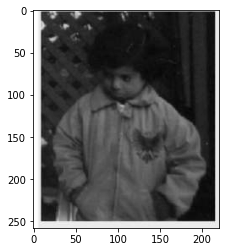

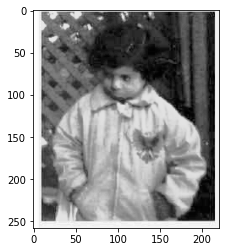

In [2]:
pout_dark=cv2.imread('pout-dark.jpg',0)
plt.imshow(pout_dark,cmap='gray')
plt.show()
equ = cv2.equalizeHist(pout_dark)
plt.imshow(equ,cmap='gray')
plt.show()

User defined function for histogram equalization:

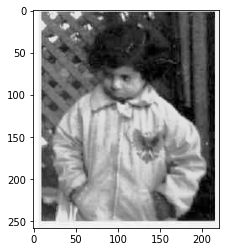

In [3]:
img=cv2.imread('pout-dark.jpg',0)
#count no of pixels in each number
width=img.shape[0]
height=img.shape[1]
values=[]

for k in range (0,256):
    count=0
    for i in range(0,width):
        for j in range(0,height):
            if img[i,j]==k:
                count=count+1
    values.append(count)

pdf=[]
for i in range(len(values)):
    pdf.append(values[i]/(width*height))

cdf=[]
sum=0
for i in range(len(pdf)):
    sum=sum+pdf[i]
    cdf.append(sum)

for i in range(len(cdf)):
    cdf[i]=cdf[i]*255

new_img=np.zeros((width,height),np.uint8)

for i in range(0,width):
    for j in range(0,height):
        new_img[i,j]=cdf[img[i,j]]
    
plt.imshow(new_img,cmap='gray')
plt.show()



User defined function for histogram matching:

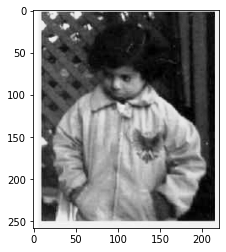

In [4]:
#histogram matching
def hist_Match(img,rows,col):
    count=0
    prob=[]
    for k in range(256):
        for i in range(rows):
            for j in range(col):
                if(img[i,j]==k):
                    count=count+1
        prob.append(count)
        count=0
    s=0
    for i in range(len(prob)):
        s=s+prob[i]
    for i in range(len(prob)):
        prob[i]=prob[i]/s

    c=0
    s1=[]
    for i in range(len(prob)):
        s1.append(prob[i]+c)
        c=s1[i]
        s1[i]=round(s1[i]*255)
        
    for i in range(rows):
        for j in range(col):
            r=img[i,j]
            img[i,j]=s1[r]
    return img,s1   

img1Dark=cv2.imread("pout-dark.jpg",0)
imgDark=cv2.imread("pout-dark.jpg",0)

ro,co=imgDark.shape
imDark,s1=hist_Match(imgDark,ro,co)
plt.imshow(img1Dark,cmap='gray')

imgRef=cv2.imread("pout-bright.jpg",0)
rows1,col1=imgRef.shape
plt.imshow(imgRef,cmap='gray')
imRef,v=hist_Match(imgRef,ro,co)

arr=[]
m=[]#set of min values

k=0
for i in range(ro):
    for j in range(co):
        for k in range(len(v)):
            if imDark[i,j]==v[k]:
                arr.append(k)

        if len(arr)==0:        
            for l in range(len(v)): 
                m.append(abs(imDark[i,j]-v[l]))
            mi=min(m)
            
            for n in range(len(m)):
                if mi==m[n]:
                    arr.append(n)
        imgDark[i,j] = round(statistics.median(arr))
        arr=[]
        m=[]
        
plt.imshow(imgDark,cmap='gray')
plt.show()

Predefined function for histogram equalization:

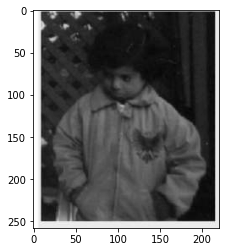

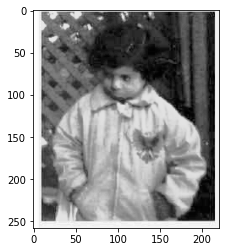

In [5]:
pout_dark=cv2.imread('pout-dark.jpg',0)
plt.imshow(pout_dark,cmap='gray')
plt.show()

equ = cv2.equalizeHist(pout_dark)
plt.imshow(equ,cmap='gray')
plt.show()